In [51]:
# 首先聚类是无监督学习,一组数据没有标签需要对其进行分类
# k-means通过计算与指定中心的欧式距离最小来达到目的
# 随机产生一组数据进行绘图

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
           n_features=2,
           centers=3,
           cluster_std=0.5,
           shuffle=True,
           random_state=0)
print(X.shape, y.shape)

(150, 2) (150,)


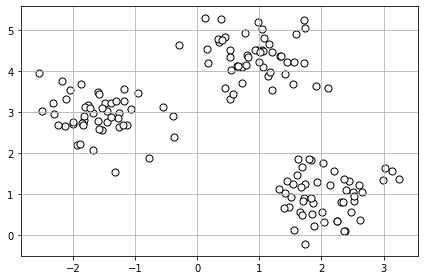

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], 
            X[:, 1],
            c='white',
            marker='o',
            edgecolors='black',
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

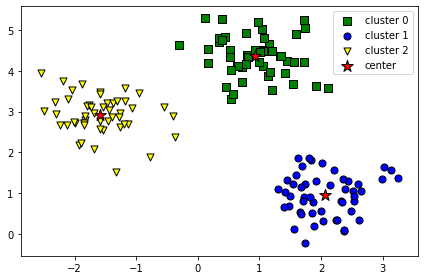

In [53]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            n_init=10,
            init='random',
            max_iter=300,
            tol=1e-4,
            random_state=0)
y_pred = km.fit_predict(X)

plt.scatter(X[y_pred == 0, 0],
            X[y_pred == 0, 1],
            s=50,
            c='green',
            marker='s',
            edgecolors='black',
            label='cluster 0')
plt.scatter(X[y_pred == 1, 0],
            X[y_pred == 1, 1],
            s=50,
            c='blue',
            marker='o',
            edgecolors='black',
            label='cluster 1')
plt.scatter(X[y_pred == 2, 0],
            X[y_pred == 2, 1],
            s=50,
            c='yellow',
            marker='v',
            edgecolors='black',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            marker='*',
            c='red',
            edgecolors='black',
            s=150,
            label='center')
plt.legend()
plt.tight_layout()
plt.show()

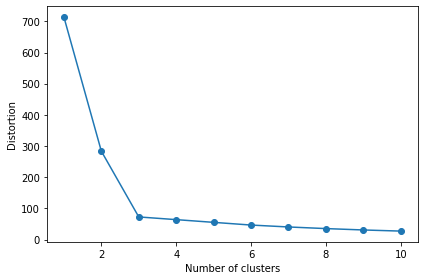

In [54]:
# 需要有一个种手段用来评估模型的好坏,或者说参数的是否合适
# 好比在聚类的时候k值应该选择为多少
# 通过拐点来确认聚类中类别的数量
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_init=10,
        init='k-means++',
        tol=1e-4,
        max_iter=300,
        n_clusters=i
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
# 通过图片可以清晰的看出在cluster数量为3最为合适,到后面基本上簇内的到中心的距离最小值下降的不是很明显
# 用数学的语言描述就是当下降的阈值小于某个范围的时,就到达了拐点

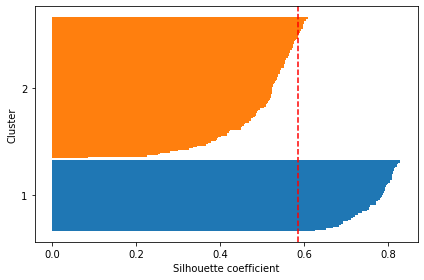

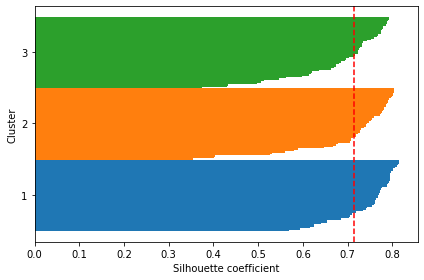

In [55]:
# 通过轮廓系数来评估模型的好坏
import numpy as np
from sklearn.metrics import silhouette_samples

# 绘制图形
def paint_silhouette(X, y_pred):
    silhouette_vals = silhouette_samples(X, y_pred, metric='euclidean')
    cluster_labels = np.unique(y_pred)
    n_clusters = len(cluster_labels)
    y_ax_lower, y_ax_upper = 0,0
    y_ticks = []


    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_pred == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1,edgecolor='none')
        y_ticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_mean = np.mean(silhouette_vals)
    plt.axvline(silhouette_mean, color='red', linestyle='--')

    plt.yticks(y_ticks, cluster_labels+1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

for i in range(2, 4):
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=1e-4,
        random_state=0,
    )
    y_pred = km.fit_predict(X)
    paint_silhouette(X, y_pred)